In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\sambi\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sambi\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = datasets.load_breast_cancer()

In [3]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# Getting X and y
X= df.data
y = df.target

In [9]:
# Splitting in to Train and Test dataset
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state = 0 )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [10]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Model Building with out Hyper parameter Tuning
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [12]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.951048951048951


In [13]:
confusion_matrix(y_test, y_pred)

array([[47,  6],
       [ 1, 89]], dtype=int64)

In [14]:
# Hyper parameter tuning
# Selecting K values
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

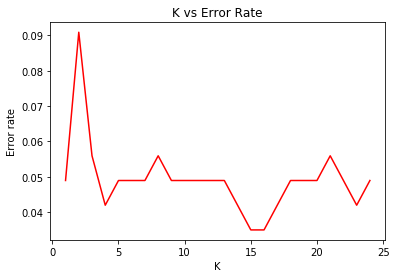

In [15]:
# Plotting the K values vs Error Rate
plt.plot(list(range(1,25)), err_list, c= 'r')
plt.xlabel("K")
plt.ylabel("Error rate")
plt.title("K vs Error Rate")
plt.show()

In [17]:
# Value of k is 15
# Model with Hyper parameter tuning
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.965034965034965


In [19]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[49  4]
 [ 1 89]]
